
# Project: No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row, such as: ‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

From this dataset we could try to solve many different questions such as:

1. What teams improved the most over the time period?
2. Which players had the most penalties? 
3. What team attributes lead to the most victories?
4. What Gender is more committed to the AppointmentIs
5. Alcoholism the reason for the No-show Appointment
6. Which neighborhood have the highest non_show rate

For this analysis, I have decided to look at the following 2 questions:

1. What Gender is more committed to the Appointment
2. Is Alcoholism the reason for the No-show Appointment

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [127]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [129]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [130]:
sum(df.duplicated())

0

In [131]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the above analysis, the following were identified:
There is no duplicated data
Most of the patients showed up for their appointments
The age colucmn has a negative value (-1)
In the gender colucmn, the female are more than the men
There are no missing values

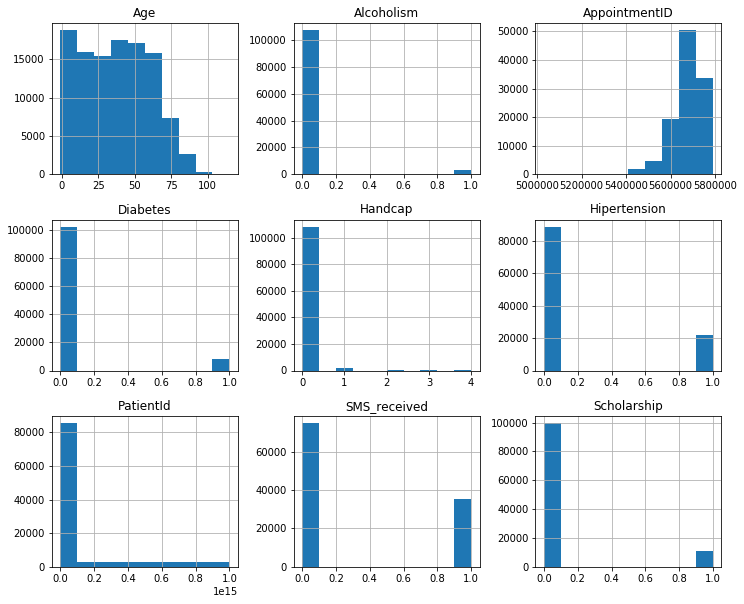

In [132]:
df.hist(figsize=(12,10));


### Data Cleaning
From the above analysis, the following are the issues found in the dataset.
Datatype of Scheduleday and Appointmentday need to be fixed
Negative age needs to be fixed
The last column needs to be fixed
 

Converting PatientID and AppointmentID to strings

In [133]:
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


Converting Appointment and Schedule Day to Time Variables. It is better to update your values upfront, otherwise, you tend to forget that they're not the type you expect, and then you waste time debugginh later.

In Pandas, you can convert a column (string/object or integer type) to datetime using the to_datetime() and astype() methods. Furthermore, you can also specify the data type (e.g., datetime) when reading your data from an external source, such as CSV or Excel.

In [134]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Deleting Negative Age

In [135]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.65943158731e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [136]:
df = df.drop([99832])

In [137]:
df['Age'].min()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: What Gender is more committed to the Appointment

In [138]:
x = df.groupby(['Gender','No-show']).count()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The above data shows that the attendance of patients between sexes is similar, Although the female has the highest number of patients, the percentage is still very close

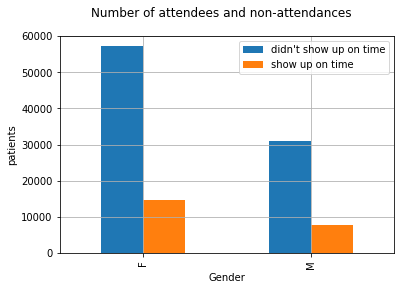

In [139]:
x["PatientId"].unstack().plot(kind='bar',stacked=False,grid=True)
plt.legend(["didn't show up on time",'show up on time'])
plt.suptitle('Number of attendees and non-attendances')
plt.ylabel('patients');

In [140]:
df['time_duration'] = (df.AppointmentDay.dt.date) - (df.ScheduledDay.dt.date)

In [141]:
df['time_duration'] = df.time_duration.dt.days

In [142]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_duration
110522,2.57213436929e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3.59626632874e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1.55766317299e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,9.21349314356e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41
110526,3.77511518121e+14,5629448,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,41


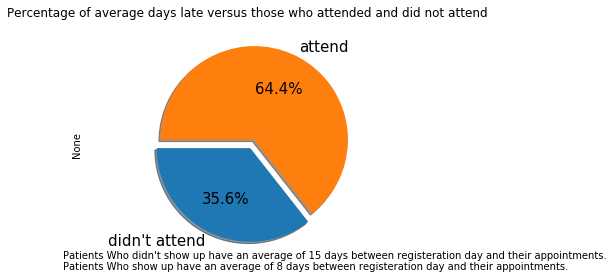

In [143]:
x = df.groupby(['No-show'])['time_duration'].mean()
x.plot(kind='pie',startangle=180,labels=["didn't attend","attend"],explode=[0,0.1],autopct='%1.1f%%',shadow=True,
       textprops={'fontsize':15})
plt.suptitle('Percentage of average days late versus those who attended and did not attend')
plt.ylabel(None)
plt.text(-2,-1.3,"Patients Who didn't show up have an average of 15 days between registeration day and their appointments.\nPatients Who show up have an average of 8 days between registeration day and their appointments.")
plt.axis('equal')
plt.show();

In [144]:
total_cases_handicap = list()
for i in range(5):
    total_cases_handicap.append(df[df['Handcap']==i].shape[0])
total_cases_handicap

[108285, 2042, 183, 13, 3]

In [145]:
handicap_number_not_atten = list()
for i in range(5):
    handicap_number_not_atten.append(df[df['No-show'] == 'Yes'][df['Handcap'] == i].shape[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [146]:
relative_values = list()
for i in range(5):
    relative_values.append(handicap_number_not_atten[i]/total_cases_handicap[i])

In [148]:
def bar_Plot_handicap(x_values, y_values):
    
    
    plt.bar(x_values, y_values, color = 'green')
    plt.title('the proportion values of "Yes" for "NO-show"')
    plt.xlabel('Degree of handicap')
    plt.ylabel('proportion value');

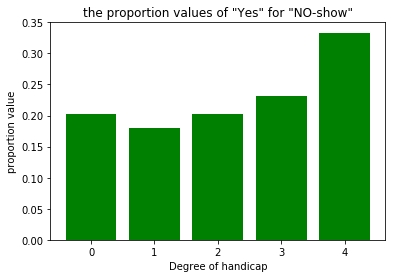

In [149]:
bar_Plot_handicap([0,1,2,3,4],relative_values)

### Research Question 2:  Is Alcoholism the reason for the No-show Appointment

Firstly, let's explore the percentage of individual diagnosis


In [ ]:
count = 110526
count_diabets = df[df['Diabetes']==1]['PatientId'].count()
print(f"Percentage of patients diagnosed with Diabetes is {count_diabets*100/count:.2f}.")

In [ ]:
count_diabets = df[df['Handcap']==1]['PatientId'].count()
print(f"Percentage of patients diagnosed with Handcap is {count_diabets*100/count:.2f}.")

In [ ]:
count_diabets = df[df['Hipertension']==1]['PatientId'].count()
print(f"Percentage of patients diagnosed with Hipertension is {count_diabets*100/count:.2f}.")

In [ ]:
count_diabets = df[df['Alcoholism']==1]['PatientId'].count()
print(f"Percentage of patients who diagnosed with Hipertension is {count_diabets*100/count:.2f}.")

What age group is most likely to show up for the appointment

In [ ]:
def age(data,rows,s1,s2):
    if s2 < s1 :
        s1 , s2 = s2 , s1
        
    return data.query(f"{s1} <= {rows} <= {s2}")

Using pandas dataframe to categorize the ages

In [ ]:
childs = df.query('Age < 18')
age_18 = age(df,"Age",18,24)
age_25 = age(df,'Age',25,34)
age_35 = age(df,'Age',35,44)
age_45 = age(df,'Age',45,54)
age_55 = age(df,'Age',55,64)
old = df.query('Age >= 65')

Calculating the mean of each age category

In [ ]:
mean_childs = childs['No-show'].mean()
mean_age_18 = age_18['No-show'].mean()
mean_age_25 = age_25['No-show'].mean()
mean_age_35 = age_35['No-show'].mean()
mean_age_45 = age_45['No-show'].mean()
mean_age_55 = age_55['No-show'].mean()
mean_old = old['No-show'].mean()

making a plot to have a clearer view of each age group category and to ascertain which age group is most likely to show up

In [ ]:
locations = [1,2,3,4,5,6,7]
heights = [mean_childs,mean_age_18,mean_age_25,mean_age_35,mean_age_45,mean_age_55,mean_old]
labels = ['Childs','18-24','25-34','35-44','45-54','55-64','Old']

plt.bar(locations,heights,tick_label = labels)
plt.title('Average "No-show" Vs Age Categories')
plt.ylim([0.7,0.9]) #to focus on this spot to feel the change
plt.xlabel('Age Category')
plt.ylabel('Average "No-show"')

<a id='conclusions'></a>
## Conclusions

In the process of wrangling this data, some data cleaning were carried out. The column with the negative age was dropped. The date time and Appointment time were fixed. The data is pretty clean so there was no need for much cleaning. In anwering question one. I groubed by gender and plotted a histogram against the No-show. The result shows that the attendance of patients between sexes is similar, Although the female has the highest number of patients, the percentage is still very close. In answering question two, I explored the percentages of individual diagnosis against the no-show. 


limitation: when i checked if Alcoholism was the reason for the n0-show appointment, and what gender is more committed. I could have explored other areas which include but not limited to Handcap, Age, Sms_received, etc.

In [150]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0